# Ćwiczenie 5

#### Zapisywanie danych w arkuszu, formatowanie i modyfikowanie wykresów

#### Tworzenie pliku

In [2590]:
# Tworzenie pliku

import xlsxwriter

# Tworzenie nowego pliku Excel
workbook = xlsxwriter.Workbook('xlsxwriter_example_with_multiple_charts.xlsx')
worksheet = workbook.add_worksheet('DataSheet')

# Dodawanie nagłówków do arkusza
headers = ['ID', 'Name', 'Age', 'Department', 'Salary']
header_format = workbook.add_format({'bold': True, 'font_color': 'white', 'bg_color': 'blue'})
for col, header in enumerate(headers):
    worksheet.write(0, col, header, header_format)

# Dodawanie danych do arkusza
data = [
    [1, 'Alice', 30, 'HR', 50000],
    [2, 'Bob', 24, 'Engineering', 55000],
    [3, 'Charlie', 29, 'Marketing', 60000],
    [4, 'David', 35, 'Finance', 70000],
    [5, 'Eva', 28, 'IT', 65000],
    [6, 'Frank', 33, 'HR', 52000],
    [7, 'Grace', 26, 'Engineering', 58000],
    [8, 'Hank', 31, 'Marketing', 61000],
    [9, 'Ivy', 38, 'Finance', 72000],
    [10, 'Jack', 27, 'IT', 66000]
]

cell_format = workbook.add_format({'text_wrap': True, 'valign': 'top', 'border': 1})
number_format = workbook.add_format({'num_format': '0.00', 'border': 1})

for row, entry in enumerate(data, start=1):
    for col, value in enumerate(entry):
        if col == 4:  # Apply number format to Salary
            worksheet.write(row, col, value, number_format)
        else:
            worksheet.write(row, col, value, cell_format)

workbook.close()


#### Wczytanie danych z istniejącego pliku Excel za pomocą pandas


In [2592]:
# Wczytanie danych z istniejącego pliku Excel za pomocą pandas
df = pd.read_excel('xlsxwriter_example_with_multiple_charts.xlsx', sheet_name='DataSheet')
df

,ID,Name,Age,Department,Salary
0,1,Alice,30,HR,50000
1,2,Bob,24,Engineering,55000
2,3,Charlie,29,Marketing,60000
3,4,David,35,Finance,70000
4,5,Eva,28,IT,65000
5,6,Frank,33,HR,52000
6,7,Grace,26,Engineering,58000
7,8,Hank,31,Marketing,61000
8,9,Ivy,38,Finance,72000
9,10,Jack,27,IT,66000


#### Tworzenie różnych typów wykresów

#### Wykres kolumnowy

In [2595]:
# Wykres kolumnowy

from openpyxl import load_workbook
from openpyxl.chart import BarChart, Reference

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu kolumnowego
bar_chart = BarChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
bar_chart.add_data(data, titles_from_data=True)
bar_chart.set_categories(categories)
bar_chart.title = "Employee Salaries"
bar_chart.x_axis.title = "Employee"
bar_chart.y_axis.title = "Salary"

# Dodanie wykresu do arkusza
ws.add_chart(bar_chart, "G2")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Wykres liniowy

In [2597]:
# Wykres liniowy

from openpyxl.chart import LineChart

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu liniowego
line_chart = LineChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
line_chart.add_data(data, titles_from_data=True)
line_chart.set_categories(categories)
line_chart.title = "Employee Salaries Over Time"
line_chart.x_axis.title = "Employee"
line_chart.y_axis.title = "Salary"

# Dodanie wykresu do arkusza
ws.add_chart(line_chart, "Q2")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')

#### Wykres kołowy

In [2599]:
from openpyxl.chart import PieChart

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu kołowego
pie_chart = PieChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=4, min_row=2, max_row=11)
pie_chart.add_data(data, titles_from_data=True)
pie_chart.set_categories(categories)
pie_chart.title = "Department Salary Distribution"

# Dodanie wykresu do arkusza
ws.add_chart(pie_chart, "G14")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Wykres obszarowy

In [2601]:
# Wykres obszarowy

from openpyxl.chart import AreaChart

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu obszarowego
area_chart = AreaChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
area_chart.add_data(data, titles_from_data=True)
area_chart.set_categories(categories)
area_chart.title = "Employee Salaries (Area Chart)"
area_chart.x_axis.title = "Employee"
area_chart.y_axis.title = "Salary"

# Dodanie wykresu do arkusza
ws.add_chart(area_chart, "Q14")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Wykres scatter (punktowy)

In [2603]:
# Wykres scatter

from openpyxl.chart import ScatterChart, Series

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu scatter
scatter_chart = ScatterChart()
xvalues = Reference(ws, min_col=2, min_row=2, max_row=11)
yvalues = Reference(ws, min_col=5, min_row=2, max_row=11)
series = Series(yvalues, xvalues, title="Salary")
scatter_chart.series.append(series)
scatter_chart.title = "Employee Salaries (Scatter Chart)"
scatter_chart.x_axis.title = "Employee"
scatter_chart.y_axis.title = "Salary"

# Dodanie wykresu do arkusza
ws.add_chart(scatter_chart, "G30")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Wykres radarowy

In [2605]:
# Wykres radarowy

from openpyxl.chart import RadarChart

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu radarowego
radar_chart = RadarChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
radar_chart.add_data(data, titles_from_data=True)
radar_chart.set_categories(categories)
radar_chart.title = "Employee Salaries (Radar Chart)"

# Dodanie wykresu do arkusza
ws.add_chart(radar_chart, "Q30")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Wykres słupkowy poziomy

In [2607]:
# Wykres słupkowy poziomy

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie wykresu słupkowego
bar_chart = BarChart()
bar_chart.type = "bar"  # Zmiana typu wykresu na 'bar'
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
bar_chart.add_data(data, titles_from_data=True)
bar_chart.set_categories(categories)
bar_chart.title = "Employee Salaries (Bar Chart)"
bar_chart.x_axis.title = "Salary"
bar_chart.y_axis.title = "Employee"

# Dodanie wykresu do arkusza
ws.add_chart(bar_chart, "G46")

# Zmiana szerokości kolumn i wysokości wierszy w nowym arkuszu
bar_chart.width = 32  # szerokość w centymetrach
bar_chart.height = 10  # wysokość w centymetrach

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Out of the topic

#### Wykres kolumnowy

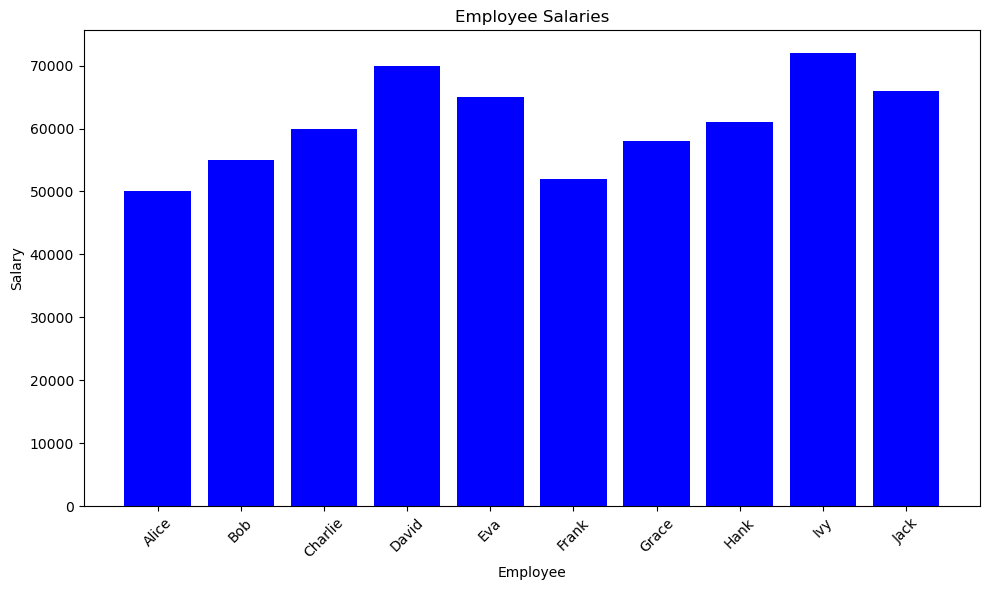

In [2610]:
import matplotlib.pyplot as plt

# Wykres kolumnowy

plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Salary'], color='blue')
plt.title('Employee Salaries')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Wykres liniowy

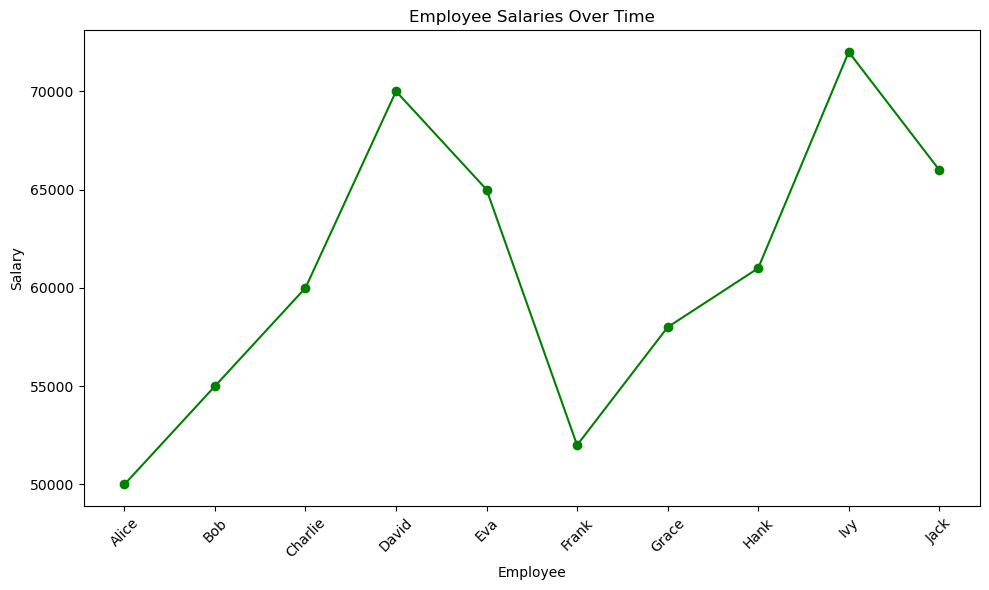

In [2612]:
# Wykres liniowy

plt.figure(figsize=(10, 6))
plt.plot(df['Name'], df['Salary'], marker='o', linestyle='-', color='green')
plt.title('Employee Salaries Over Time')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Wykres kołowy

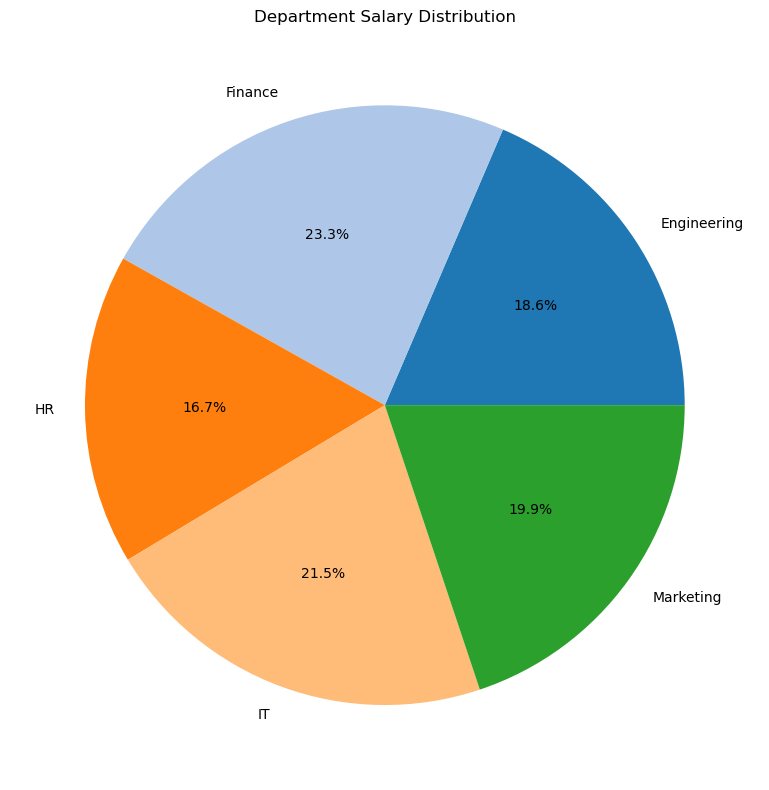

In [2614]:
# Wykres kołowy

salary_by_department = df.groupby('Department')['Salary'].sum()
plt.figure(figsize=(8, 8))
plt.pie(salary_by_department, labels=salary_by_department.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Department Salary Distribution')
plt.tight_layout()
plt.show()


#### Wykres słupkowy

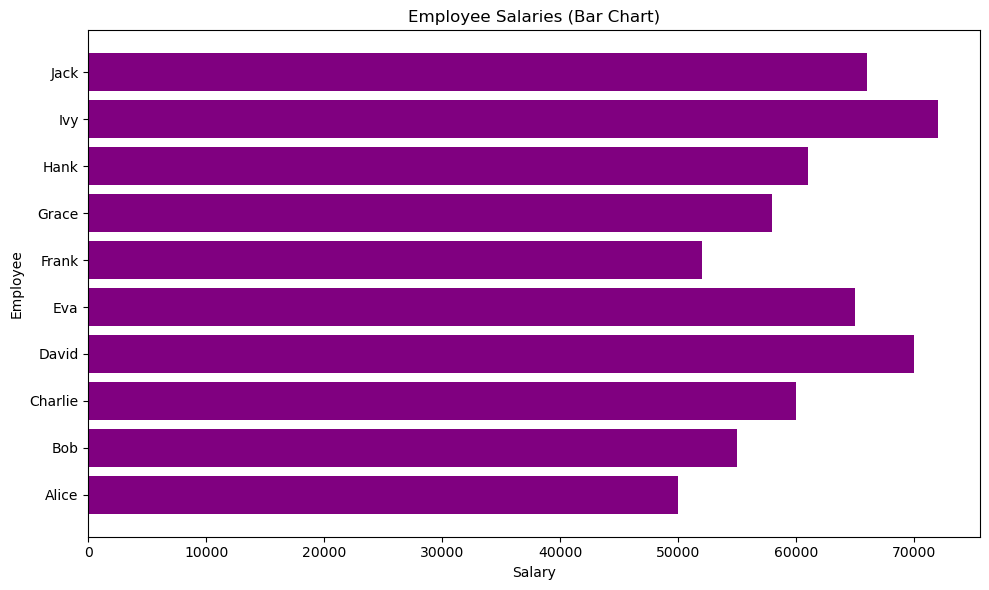

In [2616]:
# Wykres słupkowy

plt.figure(figsize=(10, 6))
plt.barh(df['Name'], df['Salary'], color='purple')
plt.title('Employee Salaries (Bar Chart)')
plt.xlabel('Salary')
plt.ylabel('Employee')
plt.tight_layout()
plt.show()


#### Wykres obszarowy

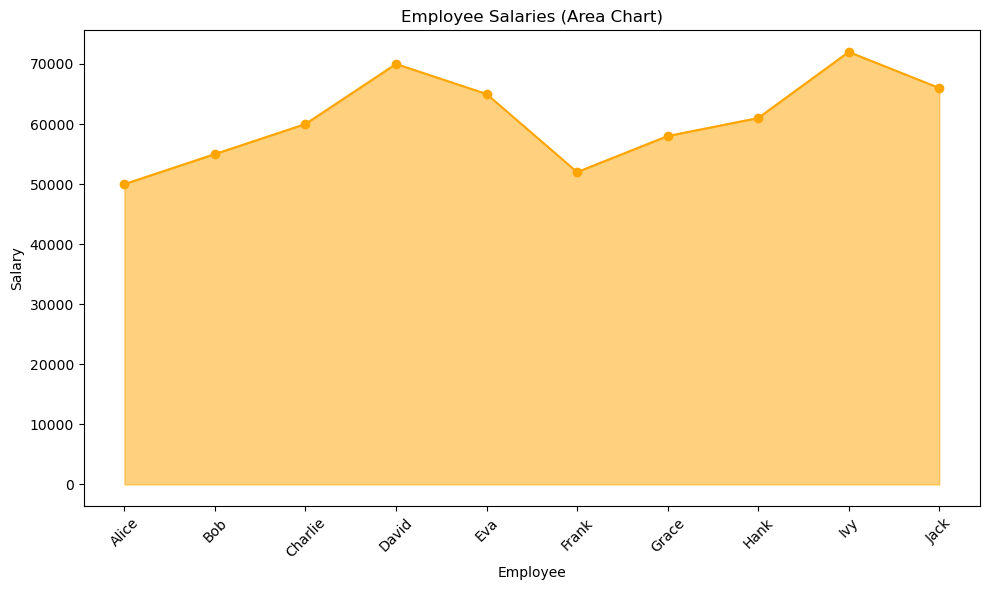

In [2618]:
# Wykres obszarowy

plt.figure(figsize=(10, 6))
plt.fill_between(df['Name'], df['Salary'], color='orange', alpha=0.5)
plt.plot(df['Name'], df['Salary'], marker='o', linestyle='-', color='orange')
plt.title('Employee Salaries (Area Chart)')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Wykres scatter (punktowy)

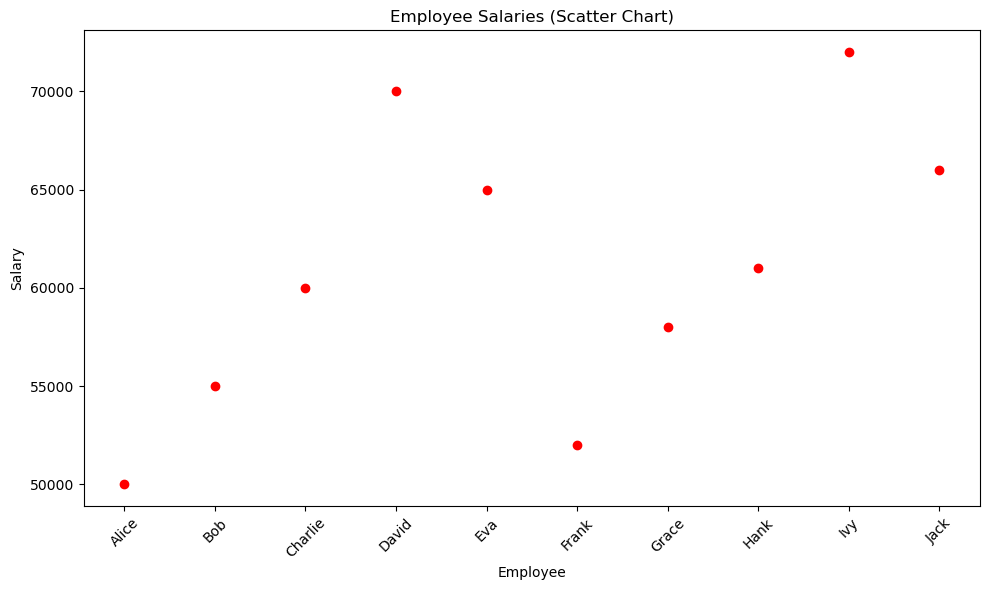

In [2620]:
# Wykres scatter

plt.figure(figsize=(10, 6))
plt.scatter(df['Name'], df['Salary'], color='red')
plt.title('Employee Salaries (Scatter Chart)')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Wykres radarowy

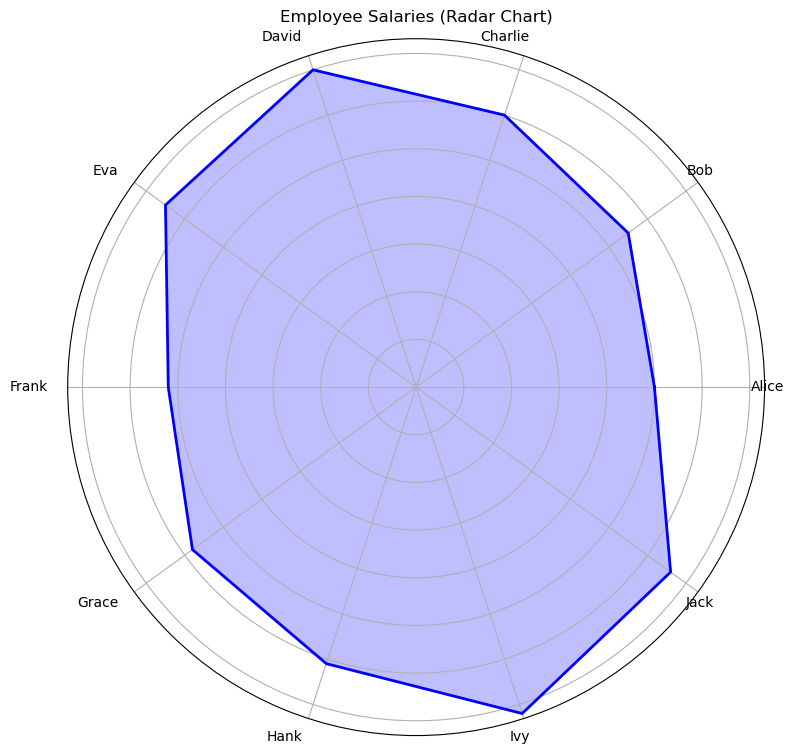

In [2622]:
import numpy as np

# Przygotowanie danych do wykresu radarowego
categories = df['Name'].tolist()
values = df['Salary'].tolist()

# Liczba zmiennych
num_vars = len(categories)

# Współrzędne kątowe dla osi radarowych
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Powtórzenie wartości na koniec, aby zamknąć wykres
values += values[:1]
angles += angles[:1]

# Inicjalizacja wykresu radarowego
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Wykres radarowy
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Dodanie etykiet
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45, ha='right')

plt.title('Employee Salaries (Radar Chart)')
plt.tight_layout()
plt.show()


#### Dodatkowe modyfikacje wykresów

#### Wykres kolumnowy poziomy

In [2625]:
from openpyxl import load_workbook
from openpyxl.chart import BarChart, LineChart, PieChart, RadarChart, ScatterChart, Reference, Series
from openpyxl.chart.label import DataLabelList

# Wczytanie istniejącego pliku Excel za pomocą openpyxl
wb = load_workbook('xlsxwriter_example_with_multiple_charts.xlsx')
ws = wb['DataSheet']

# Tworzenie nowego arkusza dla wykresów
chart_sheet = wb.create_sheet(title='ChartsSheet')

# Tworzenie wykresu kolumnowego
bar_chart = BarChart()
bar_chart.type = "bar"  # Zmiana typu wykresu na 'bar'
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=1, min_row=2, max_row=11)
bar_chart.add_data(data, titles_from_data=True)
bar_chart.set_categories(categories)
bar_chart.title = "Employee Salaries (Bar Chart)"
bar_chart.x_axis.title = "Salary"
bar_chart.y_axis.title = "Employee"
bar_chart.dataLabels = DataLabelList()
bar_chart.dataLabels.showVal = True
for serie in bar_chart.series:
    serie.graphicalProperties.line.solidFill = "FF5733"
    serie.graphicalProperties.solidFill = "FF5733"
bar_chart.width = 34  # szerokość w centymetrach
bar_chart.height = 10  # wysokość w centymetrach
chart_sheet.add_chart(bar_chart, "B2")

#### Wykres liniowy

In [2627]:
# Tworzenie wykresu liniowego
line_chart = LineChart()
line_chart.add_data(data, titles_from_data=True)
line_chart.set_categories(categories)
line_chart.title = "Employee Salaries Over Time"
line_chart.x_axis.title = "Employee"
line_chart.y_axis.title = "Salary"
line_chart.dataLabels = DataLabelList()
line_chart.dataLabels.showVal = True
for serie in line_chart.series:
    serie.graphicalProperties.line.solidFill = "32CD32"
    serie.graphicalProperties.line.width = 10050  # Szerokość linii
    serie.marker.symbol = "square"
    serie.marker.size = 10
    serie.marker.graphicalProperties.solidFill = "FF0000"  # Kolor wypełnienia markera
    serie.marker.graphicalProperties.line.solidFill = "000000"  # Kolor linii markera
line_chart.width = 15  # szerokość w centymetrach
line_chart.height = 10  # wysokość w centymetrach
chart_sheet.add_chart(line_chart, "M23")

#### Wykres kołowy

In [2629]:
# Tworzenie wykresu kołowego
pie_chart = PieChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
pie_chart.add_data(data, titles_from_data=True)
pie_chart.set_categories(categories)
pie_chart.title = "Department Salary Distribution"

# Dodanie etykiet danych z procentami
pie_chart.dataLabels = DataLabelList()
pie_chart.dataLabels.showPercent = True

# Dodanie kolorów do serii danych
colors = ["FF5733", "33FF57", "3357FF", "F033FF", "33FFF3", "FF33EC", "FF8333", "3FFF33", "8B33FF", "FF3383"]
for i, pt in enumerate(pie_chart.series[0].dPt):
    pt.graphicalProperties.solidFill = colors[i % len(colors)]

pie_chart.width = 15  # szerokość w centymetrach
pie_chart.height = 10  # wysokość w centymetrach

# Dodanie wykresu do arkusza
chart_sheet.add_chart(pie_chart, "B23")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')


#### Wykres radarowy

In [2631]:
# Tworzenie wykresu radarowego
radar_chart = RadarChart()
data = Reference(ws, min_col=5, min_row=1, max_row=11)
categories = Reference(ws, min_col=2, min_row=2, max_row=11)
radar_chart.add_data(data, titles_from_data=True)
radar_chart.set_categories(categories)
radar_chart.title = "Employee Salaries (Radar Chart)"
radar_chart.dataLabels = DataLabelList()
radar_chart.dataLabels.showVal = True
for serie in radar_chart.series:
    serie.graphicalProperties.line.solidFill = "FF5733"  # Kolor linii serii danych
    serie.graphicalProperties.line.width = 10050  # Szerokość linii
chart_sheet.add_chart(radar_chart, "B44")

#### Wykres scatter (punktowy)

In [2633]:
# Tworzenie wykresu scatter
scatter_chart = ScatterChart()
xvalues = Reference(ws, min_col=1, min_row=2, max_row=11)
yvalues = Reference(ws, min_col=5, min_row=2, max_row=11)
series = Series(yvalues, xvalues, title="Salary")
scatter_chart.series.append(series)
scatter_chart.title = "Employee Salaries (Scatter Chart)"
scatter_chart.x_axis.title = "Employee"
scatter_chart.y_axis.title = "Salary"
scatter_chart.dataLabels = DataLabelList()
scatter_chart.dataLabels.showVal = True
for serie in scatter_chart.series:
    serie.graphicalProperties.line.solidFill = "32CD32"
    serie.graphicalProperties.line.width = 10050  # Szerokość linii
    serie.marker.symbol = "circle"
    serie.marker.size = 10
    serie.marker.graphicalProperties.solidFill = "FF0000"  # Kolor wypełnienia markera
    serie.marker.graphicalProperties.line.solidFill = "000000"  # Kolor linii markera
scatter_chart.width = 15  # szerokość w centymetrach
scatter_chart.height = 10  # wysokość w centymetrach
chart_sheet.add_chart(scatter_chart, "M44")

# Zapisanie pliku
wb.save('xlsxwriter_example_with_multiple_charts.xlsx')